In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt
import keras.backend as K
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16
%matplotlib inline
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
#load the dataset
imagePatches = glob('/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x151_y1051_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y901_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x701_y651_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x951_y1401_class0.png
/kaggle/input/breast-histopathology-images/IDC_

In [3]:
# Two arrays holding images by class type

# Define two arrays to hold images of class 0 (no cancer) and class 1 (cancer)
class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

# Loop through the imagePatches list and categorize images into class0 and class1 arrays
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

# Select a subset of images for each class (e.g., first 10000 images)
sampled_class0 = class0[:10000]
sampled_class1 = class1[:10000]

# Define the image size for resizing
img_size = 75

# Import required libraries
from matplotlib.image import imread
import cv2

# Function to get image arrays with labels
def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i, cv2.IMREAD_COLOR)
            img_sized = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label])
    return img_arrays

# Create image arrays for class 0 and class 1
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

# Combine the class arrays into a single array
combined_data = np.concatenate((np.array(class0_array, dtype=object), np.array(class1_array, dtype=object)))

# Data splitting
X = []
y = []

# Separate features (images) and labels from the combined data
for features, label in combined_data:
    X.append(features)
    y.append(label)

# Convert the feature data and labels to NumPy arrays
X = np.array(X).reshape(-1, img_size, img_size, 3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print the shapes of the data and labels arrays
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(15000, 75, 75, 3) (5000, 75, 75, 3) (15000, 2) (5000, 2)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
Epoch 1/100
469/469 [==============================] - 16s 26ms/step - loss: 0.7475 - accuracy: 0.5325 - val_loss: 0.6544 - val_accuracy: 0.6142
Epoch 2/100
469/469 [==============================] - 11s 24ms/step - loss: 0.6554 - accuracy: 0.6193 - val_loss: 0.5982 - val_accuracy: 0.7344
Epoch 3/100
469/469 [==============================] - 11s 24ms/step - loss: 0.6131 - accuracy: 0.6793 - val_loss: 0.5630 - val_accuracy: 0.7496
Epoch 4/100
469/469 [==============================] - 11s 24ms/step - loss: 0.5847 - accuracy: 0.7101 - val_loss: 0.5396 - val_accuracy: 0.7554
Epoch 5/100
469/469 [==============================] - 11s 24ms/step - loss: 0.5712 - accuracy: 0.7197 - val_loss: 0.5224 - val_accuracy: 0.7632
Epoch 6/100
469/469 [==============================] - 11s 23ms/step - loss: 0.5498 - accuracy: 0.7381 - val_loss: 0.5094 - val_accuracy: 0.7672
Epoch 7/100
469/469 [==============================] - 11s 23ms/st

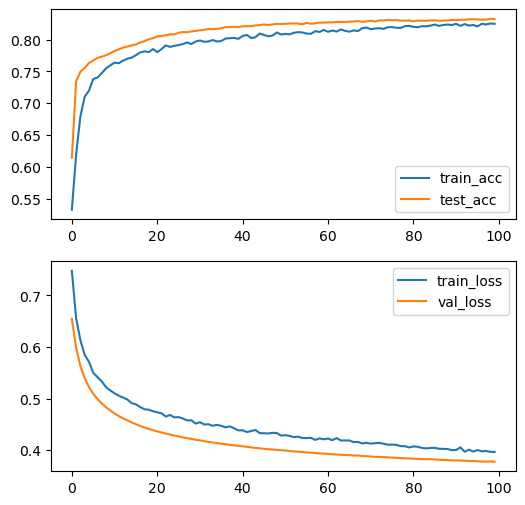

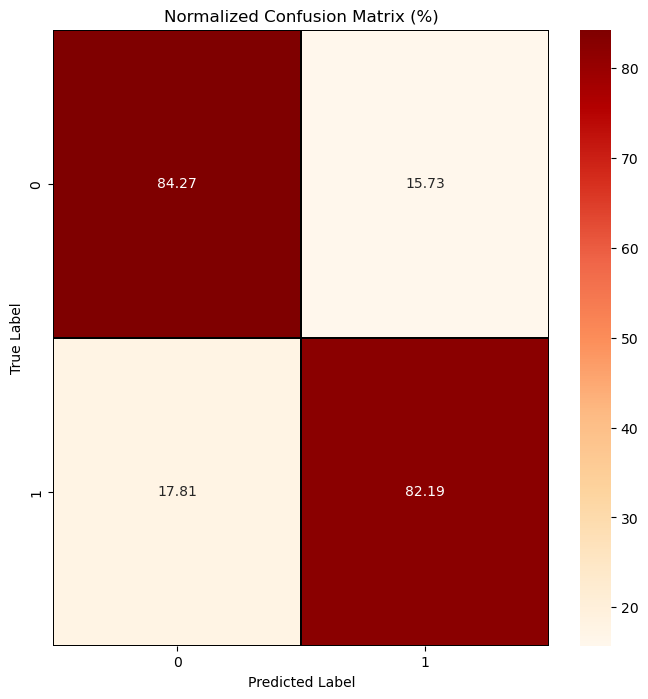

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2524
           1       0.84      0.82      0.83      2476

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False,
                      input_shape=(img_size, img_size, 3))

# Freeze the extraction layers
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation="relu")(x)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Confirm unfrozen layers
for layer in model.layers:
    if layer.trainable == True:
        print(layer)

# Callback for saving the best model during training
callbacks = [ModelCheckpoint('resnet50model.hdf5', save_best_only=True)]

# Compile the model
opt = Adam(learning_rate=0.0000001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

# Training the model
%time
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=100, callbacks=callbacks)

# Define the F1 score function
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

# Define custom evaluation metrics
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    f1_score,
]

# Plot the accuracy and loss graphs
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label="train_acc")
plt.plot(history.history['val_accuracy'], label="test_acc")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()

# Evaluate the model on the test data
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix plot
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Calculate normalized confusion matrix
confusion_mtx_normalized = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]

# Convert to percentage format
confusion_mtx_normalized_percentage = confusion_mtx_normalized * 100

# Plot the normalized confusion matrix with percentage values
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx_normalized_percentage, annot=True, linewidths=0.01, cmap="OrRd", linecolor="black", fmt='.2f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix (%)")
plt.show()


# Display classification report
print(classification_report(Y_true, Y_pred_classes))


In [6]:
# Two arrays holding images by class type
class0 = []  # 0 = no cancer
class1 = []  # 1 = cancer

# Assuming imagePatches is a list of image filenames
for filename in imagePatches:
    if filename.endswith("class0.png"):
        class0.append(filename)
    else:
        class1.append(filename)

# Select a subset of the class arrays for sampling
sampled_class0 = class0[10000:20000]
sampled_class1 = class1[10000:20000]

# Image size
img_size = 75

# Import necessary libraries
from matplotlib.image import imread
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Function to resize and preprocess images
def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i, cv2.IMREAD_COLOR)
            img_sized = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label])
    return img_arrays

# Get image arrays for each class
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

# Combine the class arrays
combined_data = np.concatenate((np.array(class0_array, dtype=object), np.array(class1_array, dtype=object)))

# Data splitting
X = []
y = []

# Iterate through the combined data to separate features (X) and labels (y)
for features, label in combined_data:
    X.append(features)
    y.append(label)

# Convert lists to numpy arrays and reshape images
X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print the shapes of the arrays
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(15000, 75, 75, 3) (5000, 75, 75, 3) (15000, 2) (5000, 2)


58889256/58889256 [==============================] - 3s 0us/step
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
Epoch 1/100
469/469 [==============================] - 13s 22ms/step - loss: 2.2307 - accuracy: 0.5004 - val_loss: 1.1901 - val_accuracy: 0.5240
Epoch 2/100
469/469 [==============================] - 9s 19ms/step - loss: 1.7375 - accuracy: 0.5249 - val_loss: 0.9980 - val_accuracy: 0.5856
Epoch 3/100
469/469 [==============================] - 9s 19ms/step - loss: 1.5637 - accuracy: 0.5600 - val_loss: 0.8841 - val_accuracy: 0.6264
Epoch 4/100
469/469 [==============================] - 9s 20ms/step - loss: 1.4757 - accuracy: 0.5801 - val_loss: 0.8232 - val_accuracy: 0.6530
Epoch 5/100
469/469 [==============================] - 9s 19ms/step - loss: 1.4168 - accuracy: 0.5923 - val_loss: 0.7841 - val_accuracy: 0.6760
Epoch 6/100
469/469 [==============================] - 9s 18ms/step - loss: 1.3482 - accuracy: 0.6111 - val_loss: 0.7627 - val_accuracy: 0.6910
Epoch 

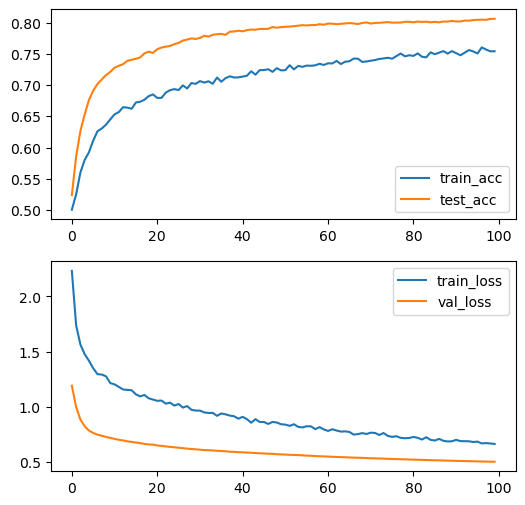

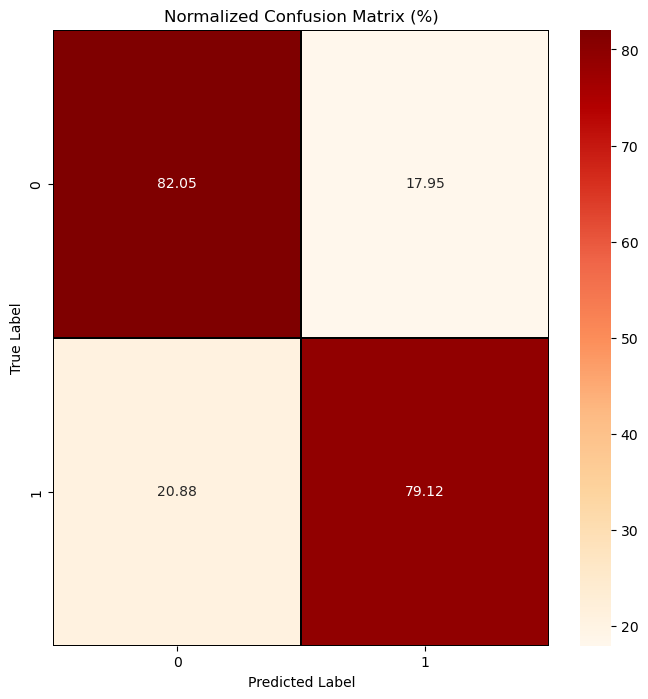

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2524
           1       0.81      0.79      0.80      2476

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000



In [7]:
# Import VGG16 model architecture and necessary libraries
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load pre-trained VGG16 model with ImageNet weights
vgg16_model = VGG16(weights='imagenet', include_top=False,
                    input_shape=(img_size, img_size, 3))

# Freeze the layers of the pre-trained model
vgg16_model.trainable = False

# Add custom top layers for classification
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation="relu")(x)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='sigmoid')(x)

# Create the final VGG16 model with custom top layers
vgg16_model = Model(inputs=vgg16_model.input, outputs=predictions)

# Confirm trainable layers
for layer in vgg16_model.layers:
    if layer.trainable == True:
        print(layer)

# Define callbacks for saving the best model
callbacks = [ModelCheckpoint('vgg16model.hdf5', save_best_only=True)]

# Compile the model with appropriate optimizer, loss function, and metrics
opt = Adam(learning_rate=0.0000001)
vgg16_model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

# Train the model
%time
vgg16history = vgg16_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                              verbose=1, epochs=100, callbacks=callbacks)

# Plot the accuracy and loss graphs
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(vgg16history.history['accuracy'], label="train_acc")
plt.plot(vgg16history.history['val_accuracy'], label="test_acc")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(vgg16history.history['loss'], label="train_loss")
plt.plot(vgg16history.history['val_loss'], label="val_loss")
plt.legend()

# Predict classes and create a confusion matrix
Y_pred = vgg16_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)
# Generate confusion matrix plot
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Calculate normalized confusion matrix
confusion_mtx_normalized = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]

# Convert to percentage format
confusion_mtx_normalized_percentage = confusion_mtx_normalized * 100

# Plot the normalized confusion matrix with percentage values
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx_normalized_percentage, annot=True, linewidths=0.01, cmap="OrRd", linecolor="black", fmt='.2f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix (%)")
plt.show()


# Print the classification report
print(classification_report(Y_true, Y_pred_classes))


In [8]:
# Two arrays holding images by class type

# Initialize arrays to hold images for each class
class0 = []  # 0 = no cancer
class1 = []  # 1 = cancer

# Iterate through imagePatches and categorize into respective classes
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
         class1.append(filename)

# Sample a subset of data from each class
sampled_class0 = class0[20000:30000]
sampled_class1 = class1[20000:30000]

# Print the number of sampled images in each class
print(len(sampled_class0))

# Set the image size for resizing
img_size = 75

# Import necessary libraries
from matplotlib.image import imread
import cv2

# Function to preprocess and resize images
def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            # Read and resize image using OpenCV
            img = cv2.imread(i, cv2.IMREAD_COLOR)
            img_sized = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label])
    return img_arrays

# Generate image arrays for each class
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

# Combine the arrays from both classes
combined_data = np.concatenate((np.array(class0_array, dtype=object), np.array(class1_array, dtype=object)))

# Data splitting
X = []
y = []

# Split features (X) and labels (y)
for features, label in combined_data:
    X.append(features)
    y.append(label)

# Convert lists to numpy arrays and reshape
X = np.array(X).reshape(-1, img_size, img_size, 3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print the shapes of the training and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


10000
(15000, 75, 75, 3) (5000, 75, 75, 3) (15000, 2) (5000, 2)


83683744/83683744 [==============================] - 4s 0us/step
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
Epoch 1/100
469/469 [==============================] - 16s 25ms/step - loss: 2.6537 - accuracy: 0.6911 - val_loss: 0.5105 - val_accuracy: 0.7810
Epoch 2/100
469/469 [==============================] - 11s 23ms/step - loss: 0.6738 - accuracy: 0.7325 - val_loss: 0.4594 - val_accuracy: 0.7992
Epoch 3/100
469/469 [==============================] - 10s 22ms/step - loss: 0.5397 - accuracy: 0.7575 - val_loss: 0.4538 - val_accuracy: 0.7992
Epoch 4/100
469/469 [==============================] - 10s 21ms/step - loss: 0.5310 - accuracy: 0.7581 - val_loss: 0.4566 - val_accuracy: 0.7996
Epoch 5/100
469/469 [==============================] - 10s 21ms/step - loss: 0.5103 - accuracy: 0.7643 - val_loss: 0.4565 - val_accuracy: 0.8054
Epoch 6/100
469/469 [==============================] - 11s 23ms/step - loss: 0.5021 - accuracy: 0.7683 - val_loss: 0.4453 - val_accuracy: 0.8058
E

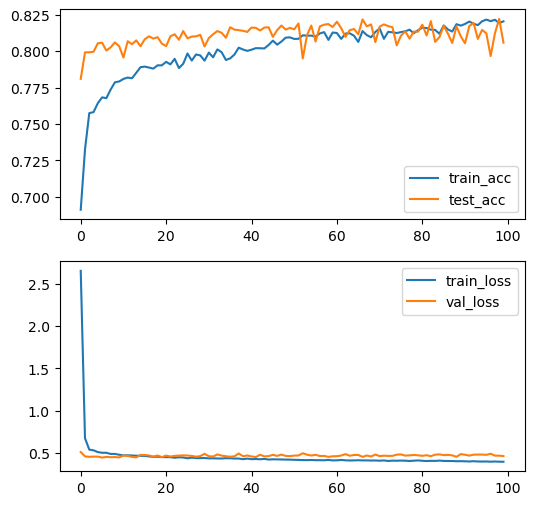

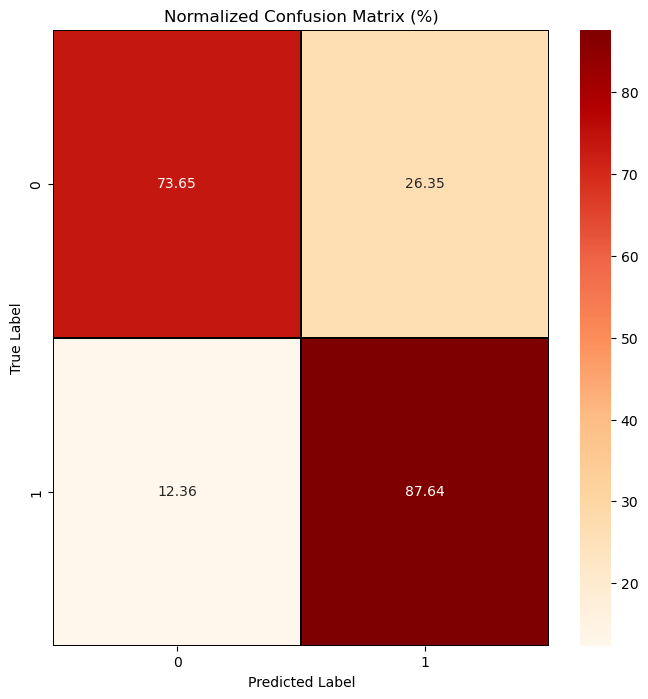

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      2524
           1       0.77      0.88      0.82      2476

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.80      5000



In [9]:
from tensorflow.keras.applications.xception import Xception

# Load the Xception model with pre-trained weights
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the layers of the pre-trained model
xception_model.trainable = False

# Add custom top layers on the Xception base model
x = xception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)
predictions = Dense(2, activation='sigmoid')(x)
xception_model = Model(inputs=xception_model.input, outputs=predictions)

# Confirm trainable layers
for layer in xception_model.layers:
    if layer.trainable == True:
        print(layer)

# Set up model callbacks, including saving the best weights
callbacks = [ModelCheckpoint('xceptionmodel.hdf5', save_best_only=True)]

# Compile the model with specified optimizer, loss function, and metrics
opt = Adam(learning_rate=0.0001)
xception_model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

# Fit the model to the training data
%time
xceptionhistory = xception_model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=100, callbacks=callbacks)

# Plot the accuracy and loss graphs
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(xceptionhistory.history['accuracy'], label="train_acc")
plt.plot(xceptionhistory.history['val_accuracy'], label="test_acc")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(xceptionhistory.history['loss'], label="train_loss")
plt.plot(xceptionhistory.history['val_loss'], label="val_loss")
plt.legend()

# Generate a confusion matrix for evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = xception_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix plot
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Calculate normalized confusion matrix
confusion_mtx_normalized = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]

# Convert to percentage format
confusion_mtx_normalized_percentage = confusion_mtx_normalized * 100

# Plot the normalized confusion matrix with percentage values
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx_normalized_percentage, annot=True, linewidths=0.01, cmap="OrRd", linecolor="black", fmt='.2f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix (%)")
plt.show()

# Generate a classification report
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))


In [3]:
# Two arrays holding images by class type

# Create separate arrays to store filenames for class 0 (no cancer) and class 1 (cancer)
class0 = []  # 0 = no cancer
class1 = []  # 1 = cancer

# Split filenames into class 0 and class 1 based on their endings
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

# Sample a subset of filenames from each class for processing
sampled_class0 = class0[30000:40000]
sampled_class1 = class1[30000:40000]

# Check the number of sampled images from each class
len(sampled_class0)

# Define the image size for resizing
img_size = 75

from matplotlib.image import imread
import cv2

# Function to convert image filenames into resized image arrays
def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i ,cv2.IMREAD_COLOR)
            img_sized = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label])
    return img_arrays

# Convert sampled image filenames into image arrays for class 0 and class 1
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

# Combine the arrays for both classes into a single dataset
combined_data = np.concatenate((np.array(class0_array, dtype=object), np.array(class1_array, dtype=object)))

# Split the combined data into training and testing sets
X = []
y = []

for features, label in combined_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert class labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print the shapes of the training and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(15000, 75, 75, 3) (5000, 75, 75, 3) (15000, 2) (5000, 2)


29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/100
469/469 [==============================] - 33s 40ms/step - loss: 1.1270 - accuracy: 0.6672 - val_loss: 0.6024 - val_accuracy: 0.8094
Epoch 2/100
469/469 [==============================] - 14s 29ms/step - loss: 0.8835 - accuracy: 0.7339 - val_loss: 0.5378 - val_accuracy: 0.8126
Epoch 3/100
469/469 [==============================] - 13s 28ms/step - loss: 0.8275 - accuracy: 0.7415 - val_loss: 0.5087 - val_accuracy: 0.8206
Epoch 4/100
469/469 [==============================] - 13s 28ms/step - loss: 0.7737 - accuracy: 0.7517 - val_loss: 0.4704 - val_accuracy: 0.8234
Epoch 5/100
469/469 [==============================] - 13s 28ms/step - loss: 0.7382 - accuracy: 0.7544 - val_loss: 0.4531 - val_accuracy: 0.8270
Epoch 6/100
469/469 [==============================] - 13s 28ms/step - loss: 0.7034 - accuracy: 0.7563 - val_loss: 0.4371 - val_accuracy: 0.8304
Epoch 7/100
469/469 [==============================] - 12s 25ms/s

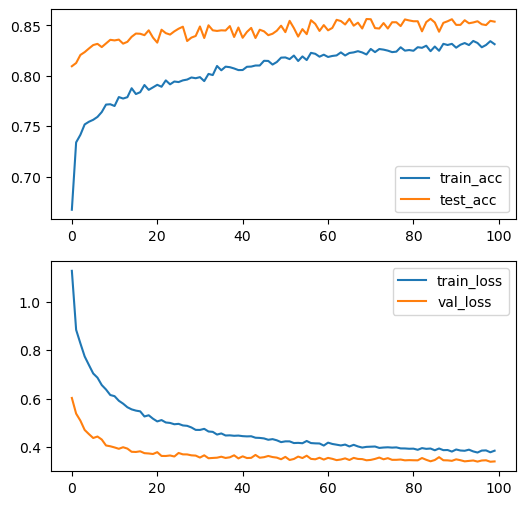

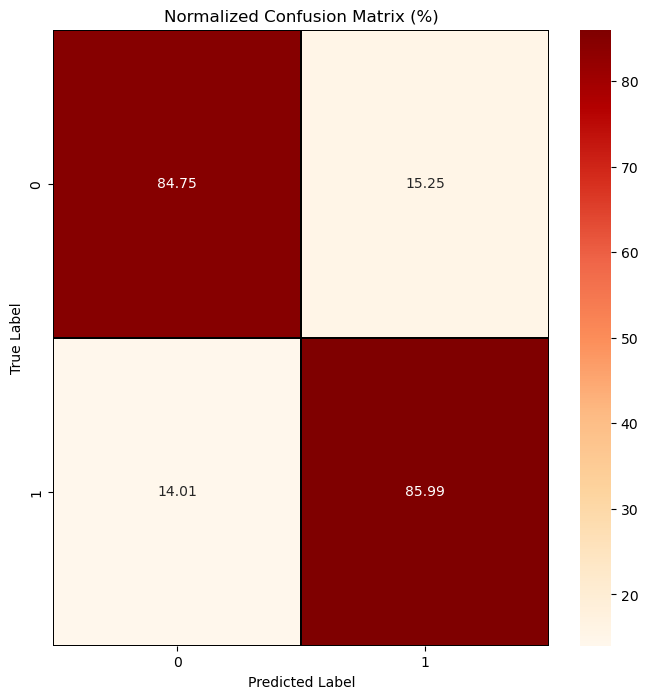

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2524
           1       0.85      0.86      0.85      2476

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [4]:
from tensorflow.keras.applications import DenseNet121

# Load the DenseNet121 model with weights pre-trained on ImageNet
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the layers of the pre-trained model
densenet_model.trainable = False

# Add custom top layers for classification
x = densenet_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation="relu")(x)
x = Dense(4096, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(2096, activation="relu")(x)

# Output layer with sigmoid activation for binary classification
predictions = Dense(2, activation='sigmoid')(x)

# Create the custom model with the base DenseNet121 and custom top layers
densenet_model = Model(inputs=densenet_model.input, outputs=predictions)

# Print trainable layers for confirmation
for layer in densenet_model.layers:
    if layer.trainable:
        print(layer)

# Configure callbacks for model checkpointing
callbacks = [ModelCheckpoint('densenetmodel.hdf5', save_best_only=True)]

# Configure the optimizer with a low learning rate
opt = Adam(learning_rate=0.000001)

# Compile the model with binary cross-entropy loss and accuracy metric
densenet_model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

# Train the model on the dataset
densenethistory = densenet_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                                     verbose=1, epochs=100, callbacks=callbacks)

# Plot the accuracy and loss graphs
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(densenethistory.history['accuracy'], label="train_acc")
plt.plot(densenethistory.history['val_accuracy'], label="test_acc")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(densenethistory.history['loss'], label="train_loss")
plt.plot(densenethistory.history['val_loss'], label="val_loss")
plt.legend()

# Generate a confusion matrix and visualize it
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = densenet_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix plot
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Calculate normalized confusion matrix
confusion_mtx_normalized = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]

# Convert to percentage format
confusion_mtx_normalized_percentage = confusion_mtx_normalized * 100

# Plot the normalized confusion matrix with percentage values
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx_normalized_percentage, annot=True, linewidths=0.01, cmap="OrRd", linecolor="black", fmt='.2f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix (%)")
plt.show()


# Generate a classification report
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))


In [5]:
# Two arrays holding images by class type

# Create arrays to hold images of different classes
class0 = []  # 0 = no cancer
class1 = []  # 1 = cancer

# Separate images into respective classes based on filenames
for filename in imagePatches:
    if filename.endswith("class0.png"):
        class0.append(filename)
    else:
        class1.append(filename)

# Select a subset of images for each class
sampled_class0 = class0[40000:50000]
sampled_class1 = class1[40000:50000]

# Print the length of the sampled arrays for confirmation
print("Class 0 Samples:", len(sampled_class0))
print("Class 1 Samples:", len(sampled_class1))

# Set image size for resizing
img_size = 75

# Import required libraries
from matplotlib.image import imread
import cv2

# Function to preprocess and resize images and create image arrays
def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i, cv2.IMREAD_COLOR)
            img_sized = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label])
    return img_arrays

# Create arrays of images and labels for both classes
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

# Combine the arrays of both classes
combined_data = np.concatenate((np.array(class0_array, dtype=object), np.array(class1_array, dtype=object)))

# Split the data into training and testing sets
X = []
y = []

for features, label in combined_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print the shapes of the datasets for confirmation
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Class 0 Samples: 10000
Class 1 Samples: 10000
X_train shape: (15000, 75, 75, 3)
X_test shape: (5000, 75, 75, 3)
y_train shape: (15000, 2)
y_test shape: (5000, 2)


17225924/17225924 [==============================] - 0s 0us/step
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Epoch 1/100
469/469 [==============================] - 9s 13ms/step - loss: 0.7459 - accuracy: 0.5391 - val_loss: 0.6644 - val_accuracy: 0.5960
Epoch 2/100
469/469 [==============================] - 5s 12ms/step - loss: 0.6983 - accuracy: 0.5663 - val_loss: 0.6403 - val_accuracy: 0.6464
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 0.6805 - accuracy: 0.5867 - val_loss: 0.6228 - val_accuracy: 0.6722
Epoch 4/100
469/469 [==============================] - 5s 12ms/step - loss: 0.6635 - accuracy: 0.6074 - val_loss: 0.6090 - val_accuracy: 0.6836
Epoch 5/100
469/469 [==============================] - 5s 11ms/step - loss: 0.6503 - accuracy: 0.6261 - val_loss: 0.5979 - val_accuracy: 0.6926
Epoch 6/100
469/469 [==============================] - 5s 11ms/step - loss: 0.6422 - accuracy: 0.6357 - val_loss: 0.5889 - val_accuracy: 0.7010
Epoch 7

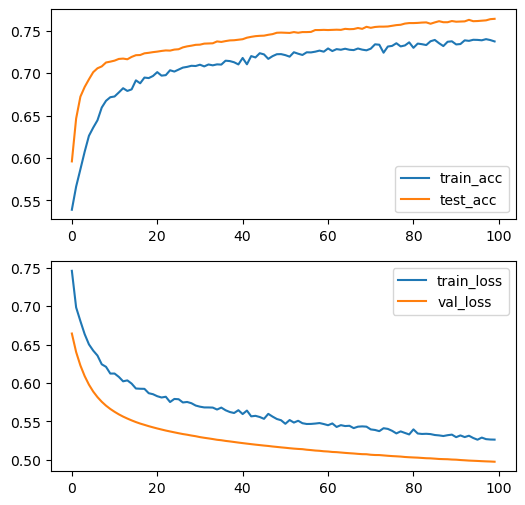

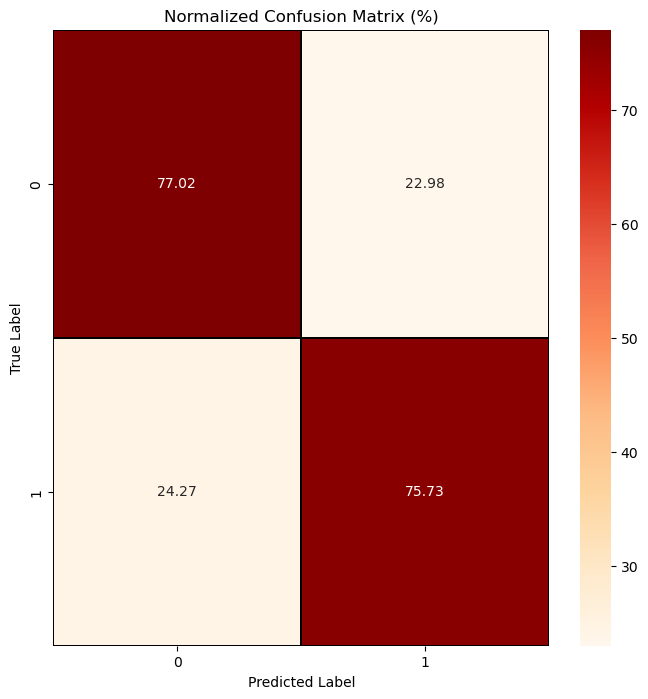

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2524
           1       0.76      0.76      0.76      2476

    accuracy                           0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000



In [6]:
from tensorflow.keras.applications.mobilenet import MobileNet

# Load MobileNet model with pre-trained weights and specify input shape
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the extraction layers to retain pre-trained weights
mobilenet_model.trainable = False

# Add custom top layers on top of the pre-trained model
x = mobilenet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation="relu")(x)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='sigmoid')(x)
mobilenet_model = Model(inputs=mobilenet_model.input, outputs=predictions)

# Display the layers that are trainable
for layer in mobilenet_model.layers:
    if layer.trainable == True:
        print(layer)

# Define callbacks for model training
callbacks = [ModelCheckpoint('mobilenetmodel.hdf5', save_best_only=True)]

# Configure the optimizer
opt = Adam(learning_rate=0.0000001)

# Compile the model with loss function, optimizer, and metrics
mobilenet_model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

# Train the model on the dataset
%time
mobilenethistory = mobilenet_model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=100, callbacks=callbacks)

# Plot the accuracy and loss graphs
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(mobilenethistory.history['accuracy'], label="train_acc")
plt.plot(mobilenethistory.history['val_accuracy'], label="test_acc")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(mobilenethistory.history['loss'], label="train_loss")
plt.plot(mobilenethistory.history['val_loss'], label="val_loss")
plt.legend()

# Calculate confusion matrix and plot it
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = mobilenet_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix plot
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Calculate normalized confusion matrix
confusion_mtx_normalized = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]

# Convert to percentage format
confusion_mtx_normalized_percentage = confusion_mtx_normalized * 100

# Plot the normalized confusion matrix with percentage values
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx_normalized_percentage, annot=True, linewidths=0.01, cmap="OrRd", linecolor="black", fmt='.2f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix (%)")
plt.show()


# Calculate and print classification report
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))
